# Exploración Inicial de Datos
## Sistema Integral Multi-Capa para la Detección de Desinformación

**Objetivo**: Análisis exploratorio completo de los datasets para entender la estructura, calidad y características de los datos.

### Plan de Ejecución:
1. Carga y primera inspección de datos
2. Análisis de forma y estructura
3. Análisis de valores faltantes
4. Análisis de distribuciones
5. Análisis de desbalance de clases
6. Visualizaciones exploratorias

In [9]:
# Importaciones principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


## 1. Carga de Datos

In [10]:
# Carga de datasets
print("Cargando datasets...")

# Dataset 1: Features tradicionales de ML
df1_features = pd.read_csv('../dataset1/Features_For_Traditional_ML_Techniques.csv')
print(f"- Dataset 1 (Features): {df1_features.shape}")

# Dataset 1: Truth Seeker Model
df1_truth = pd.read_csv('../dataset1/Truth_Seeker_Model_Dataset.csv')
print(f"- Dataset 1 (Truth Seeker): {df1_truth.shape}")

# Dataset 2: Social Media Usage
df2_social = pd.read_csv('../dataset2/social media usage dataset.csv')
print(f"- Dataset 2 (Social Media): {df2_social.shape}")

print("\nTodos los datasets cargados exitosamente")

Cargando datasets...
- Dataset 1 (Features): (134198, 64)
- Dataset 1 (Truth Seeker): (134198, 9)
- Dataset 2 (Social Media): (462, 17)

Todos los datasets cargados exitosamente


## 2. Análisis Estructural

In [11]:
def analizar_estructura(df, nombre):
    """Función para análisis estructural completo de un DataFrame"""
    print(f"\n{'='*50}")
    print(f"ANÁLISIS ESTRUCTURAL: {nombre}")
    print(f"{'='*50}")
    
    print(f"- Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas")
    print(f"- Uso de memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\n- Tipos de datos:")
    tipos = df.dtypes.value_counts()
    for tipo, cantidad in tipos.items():
        print(f"  * {tipo}: {cantidad} columnas")
    
    print("\n- Primeras 3 filas:")
    display(df.head(3))
    
    return df.info()

# Análisis de cada dataset
analizar_estructura(df1_features, "DATASET 1: FEATURES TRADICIONALES")
analizar_estructura(df1_truth, "DATASET 1: TRUTH SEEKER")
analizar_estructura(df2_social, "DATASET 2: SOCIAL MEDIA")


ANÁLISIS ESTRUCTURAL: DATASET 1: FEATURES TRADICIONALES
- Dimensiones: 134,198 filas x 64 columnas
- Uso de memoria: 124.33 MB

- Tipos de datos:
  * float64: 37 columnas
  * int64: 23 columnas
  * object: 3 columnas
  * bool: 1 columnas

- Primeras 3 filas:


,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  cred                

,Unnamed: 0,author,statement,target,BinaryNumTarget,manual_keywords,tweet,5_label_majority_answer,3_label_majority_answer
0,0,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@POTUS Biden Blunders - 6 Month Update\n\nInfl...,Mostly Agree,Agree
1,1,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,NO MAJORITY,Agree
2,2,D.L. Davis,End of eviction moratorium means millions of A...,True,1.0,"Americans, eviction moratorium",THE SUPREME COURT is siding with super rich pr...,Agree,Agree


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               134198 non-null  int64  
 1   author                   134198 non-null  object 
 2   statement                134198 non-null  object 
 3   target                   134198 non-null  bool   
 4   BinaryNumTarget          134198 non-null  float64
 5   manual_keywords          134198 non-null  object 
 6   tweet                    134198 non-null  object 
 7   5_label_majority_answer  134198 non-null  object 
 8   3_label_majority_answer  134198 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 8.3+ MB

ANÁLISIS ESTRUCTURAL: DATASET 2: SOCIAL MEDIA
- Dimensiones: 462 filas x 17 columnas
- Uso de memoria: 0.44 MB

- Tipos de datos:
  * object: 16 columnas
  * float64: 1 columnas

- Primeras 3 filas:


,Age,Sex,Level,Field,Degree,Employability,Income,Daily_used,Accounts,Hrs,Time,Followers,Posted,Posted_later,Believed,UseRes,RealName
0,18 to 22,Female,Specialisation (two years),IT related field,Diploma,I do not work I am a student,200-300 OMR,"Instagram, WhatsApp, Youtube","Instagram, WhatsApp, Youtube",2-3 hours,"Afternoon, Evening",100.0,Yes,Yes,Yes,Trade,Yes
1,18 to 22,Female,Specialisation (three years),IT related field,Diploma,I do not work I am a student,200-300 OMR,"Snapchat, WhatsApp","Instagram, Snapchat, Twitter, WhatsApp, Youtube",30 min,Afternoon,200.0,Yes,Yes,Yes,Communication,Yes
2,23 to 27,Female,Specialisation (Four years),IT related field,Bachelor,I do not work I am a student,600-700 OMR,"Instagram, TikTok, Snapchat, WhatsApp, Youtube","Instagram, TikTok, Snapchat, WhatsApp",4 hours & more,Evening,6.0,Yes,Yes,Yes,Communication,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            462 non-null    object 
 1   Sex            462 non-null    object 
 2   Level          462 non-null    object 
 3   Field          462 non-null    object 
 4   Degree         462 non-null    object 
 5   Employability  462 non-null    object 
 6   Income         462 non-null    object 
 7   Daily_used     462 non-null    object 
 8   Accounts       462 non-null    object 
 9   Hrs            462 non-null    object 
 10  Time           462 non-null    object 
 11  Followers      462 non-null    float64
 12  Posted         462 non-null    object 
 13  Posted_later   462 non-null    object 
 14  Believed       460 non-null    object 
 15  UseRes         462 non-null    object 
 16  RealName       462 non-null    object 
dtypes: float64(1), object(16)
memory usage: 61.5+ KB


## 3. Análisis de Valores Faltantes


ANÁLISIS DE VALORES FALTANTES: Features Tradicionales
------------------------------------------------------------
- No hay valores faltantes en este dataset

ANÁLISIS DE VALORES FALTANTES: Truth Seeker
------------------------------------------------------------
- No hay valores faltantes en este dataset

ANÁLISIS DE VALORES FALTANTES: Social Media
------------------------------------------------------------
-  Columnas con valores faltantes: 1


,Columna,Valores_Faltantes,Porcentaje
14,Believed,2,0.4329


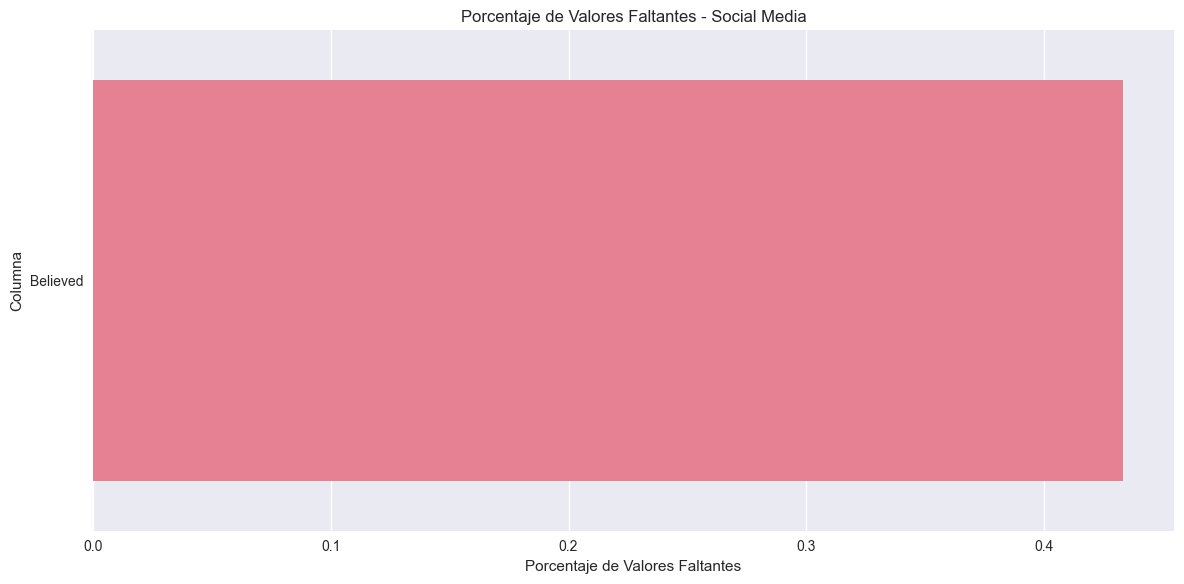

In [12]:
def analizar_valores_faltantes(df, nombre):
    """Análisis completo de valores faltantes"""
    print(f"\nANÁLISIS DE VALORES FALTANTES: {nombre}")
    print("-" * 60)
    
    # Conteo de valores faltantes
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    
    if missing.sum() == 0:
        print("- No hay valores faltantes en este dataset")
        return
    
    # DataFrame resumen
    missing_df = pd.DataFrame({
        'Columna': missing.index,
        'Valores_Faltantes': missing.values,
        'Porcentaje': missing_pct.values
    })
    
    missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values('Porcentaje', ascending=False)
    
    if len(missing_df) > 0:
        print(f"-  Columnas con valores faltantes: {len(missing_df)}")
        display(missing_df.head(10))
        
        # Visualización
        if len(missing_df) > 0:
            plt.figure(figsize=(12, 6))
            sns.barplot(data=missing_df.head(15), x='Porcentaje', y='Columna')
            plt.title(f'Porcentaje de Valores Faltantes - {nombre}')
            plt.xlabel('Porcentaje de Valores Faltantes')
            plt.tight_layout()
            plt.show()
    
# Análisis para cada dataset
analizar_valores_faltantes(df1_features, "Features Tradicionales")
analizar_valores_faltantes(df1_truth, "Truth Seeker")
analizar_valores_faltantes(df2_social, "Social Media")

## 4. Análisis de Desbalance de Clases


ANÁLISIS DE BALANCE DE CLASES: Features Tradicionales
------------------------------------------------------------
- Distribución de clases:
  • Clase 1.0: 68,930 (51.36%)
  • Clase 0.0: 65,268 (48.64%)

- Ratio de desbalance: 1.06:1
-  Clases relativamente balanceadas


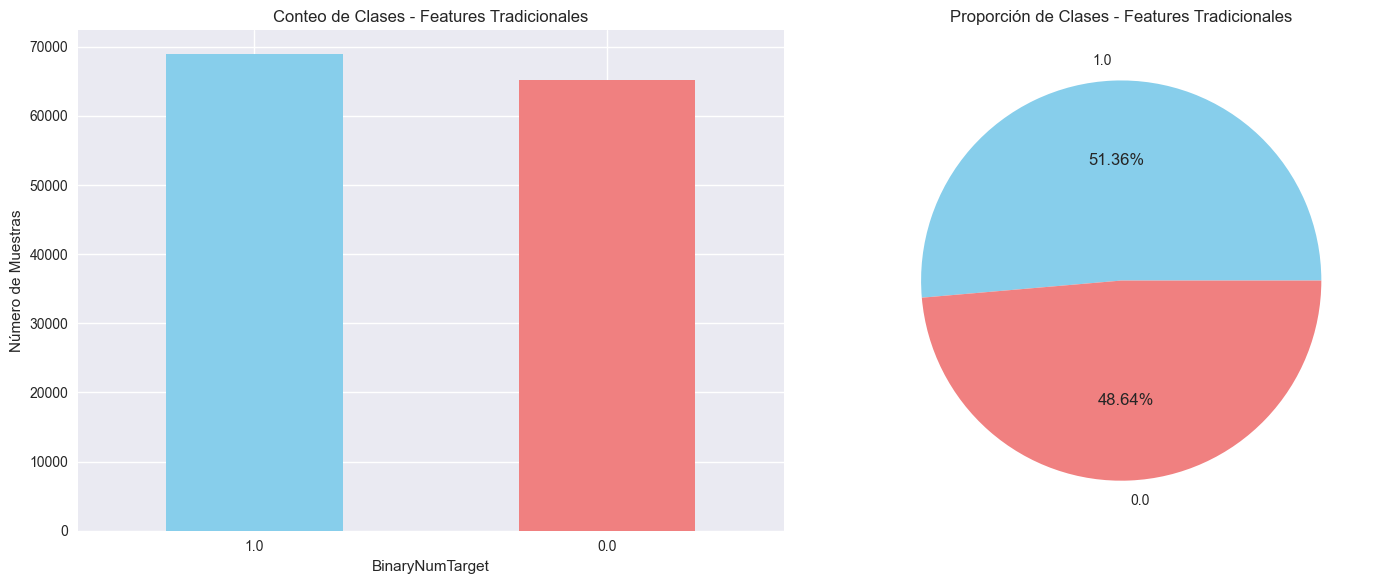


ANÁLISIS DE BALANCE DE CLASES: Truth Seeker
------------------------------------------------------------
- Distribución de clases:
  • Clase 1.0: 68,930 (51.36%)
  • Clase 0.0: 65,268 (48.64%)

- Ratio de desbalance: 1.06:1
-  Clases relativamente balanceadas


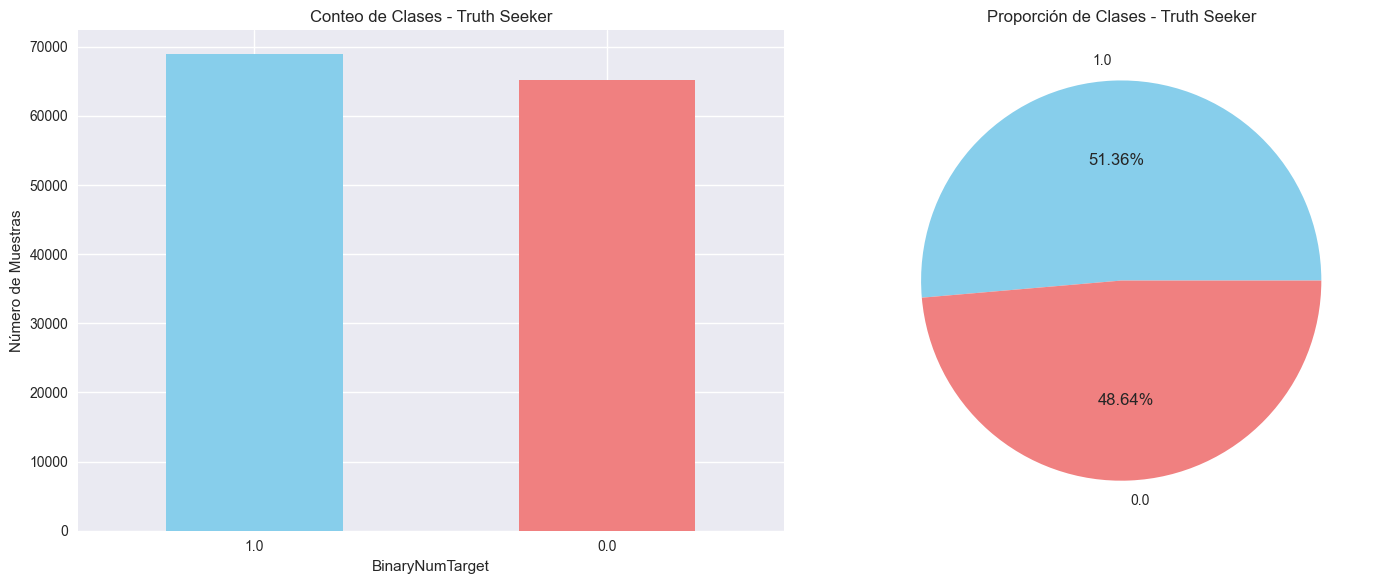

In [13]:
def analizar_balance_clases(df, target_col, nombre):
    """Análisis del balance de clases en la variable objetivo"""
    print(f"\nANÁLISIS DE BALANCE DE CLASES: {nombre}")
    print("-" * 60)
    
    if target_col not in df.columns:
        print(f"* Columna '{target_col}' no encontrada")
        return
    
    # Conteo de clases
    class_counts = df[target_col].value_counts()
    class_props = df[target_col].value_counts(normalize=True) * 100
    
    print("- Distribución de clases:")
    for clase, count in class_counts.items():
        prop = class_props[clase]
        print(f"  • Clase {clase}: {count:,} ({prop:.2f}%)")
    
    # Cálculo del ratio de desbalance
    min_class = class_counts.min()
    max_class = class_counts.max()
    imbalance_ratio = max_class / min_class
    
    print(f"\n- Ratio de desbalance: {imbalance_ratio:.2f}:1")
    
    if imbalance_ratio > 3:
        print("-  DESBALANCE SIGNIFICATIVO detectado - Usar estrategias de balanceo")
    elif imbalance_ratio > 1.5:
        print("-  Desbalance moderado - Considerar métricas balanceadas")
    else:
        print("-  Clases relativamente balanceadas")

    # Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico de barras
    class_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
    ax1.set_title(f'Conteo de Clases - {nombre}')
    ax1.set_ylabel('Número de Muestras')
    ax1.tick_params(axis='x', rotation=0)
    
    # Gráfico de pie
    class_props.plot(kind='pie', ax=ax2, autopct='%1.2f%%', colors=['skyblue', 'lightcoral'])
    ax2.set_title(f'Proporción de Clases - {nombre}')
    ax2.set_ylabel('')
    
    plt.tight_layout()
    plt.show()

# Análisis para datasets con variable objetivo
analizar_balance_clases(df1_features, 'BinaryNumTarget', "Features Tradicionales")
analizar_balance_clases(df1_truth, 'BinaryNumTarget', "Truth Seeker")

## 5. Análisis de Distribuciones Numéricas


ANÁLISIS DE DISTRIBUCIONES NUMÉRICAS: Features Tradicionales
------------------------------------------------------------
- Variables numéricas encontradas: 60

- Estadísticas descriptivas:


,Unnamed: 0,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.00,134198.000,1.341980e+05,134198.000,134198.000,134198.000,134198.000,134198.0,134198.000,134198.000,...,134198.000,134198.000,134198.000,134198.000,134198.000,134198.000,134198.000,134198.000,134198.000,134198.000
mean,67098.50,0.514,1.129308e+04,1893.454,32981.234,34195.761,73.300,0.0,0.059,0.032,...,0.136,1.003,2.366,0.259,0.307,0.122,12.832,3.559,2.250,21.439
std,38739.77,0.500,4.374971e+05,6997.696,68780.210,75101.195,1083.274,0.0,0.168,0.177,...,0.379,1.087,2.140,0.904,0.774,0.454,15.558,6.674,2.912,9.625
min,0.00,0.000,0.000000e+00,0.000,0.000,1.000,0.000,0.0,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33549.25,0.000,7.000000e+01,168.000,1356.000,3046.000,0.000,0.0,0.030,0.000,...,0.000,0.000,1.000,0.000,0.000,0.000,6.000,0.000,1.000,14.000
50%,67098.50,1.000,3.540000e+02,567.000,8377.000,11019.000,2.000,0.0,0.030,0.000,...,0.000,1.000,2.000,0.000,0.000,0.000,10.000,2.000,2.000,21.000
75%,100647.75,1.000,1.573000e+03,1726.000,33526.500,33573.750,11.000,0.0,0.030,0.000,...,0.000,2.000,3.000,0.000,0.000,0.000,15.000,4.000,3.000,28.000
max,134197.00,1.000,1.306019e+08,586901.000,1765080.000,2958918.000,222193.000,0.0,1.000,1.000,...,5.000,13.000,50.000,66.000,43.000,13.000,250.000,138.000,47.000,164.000


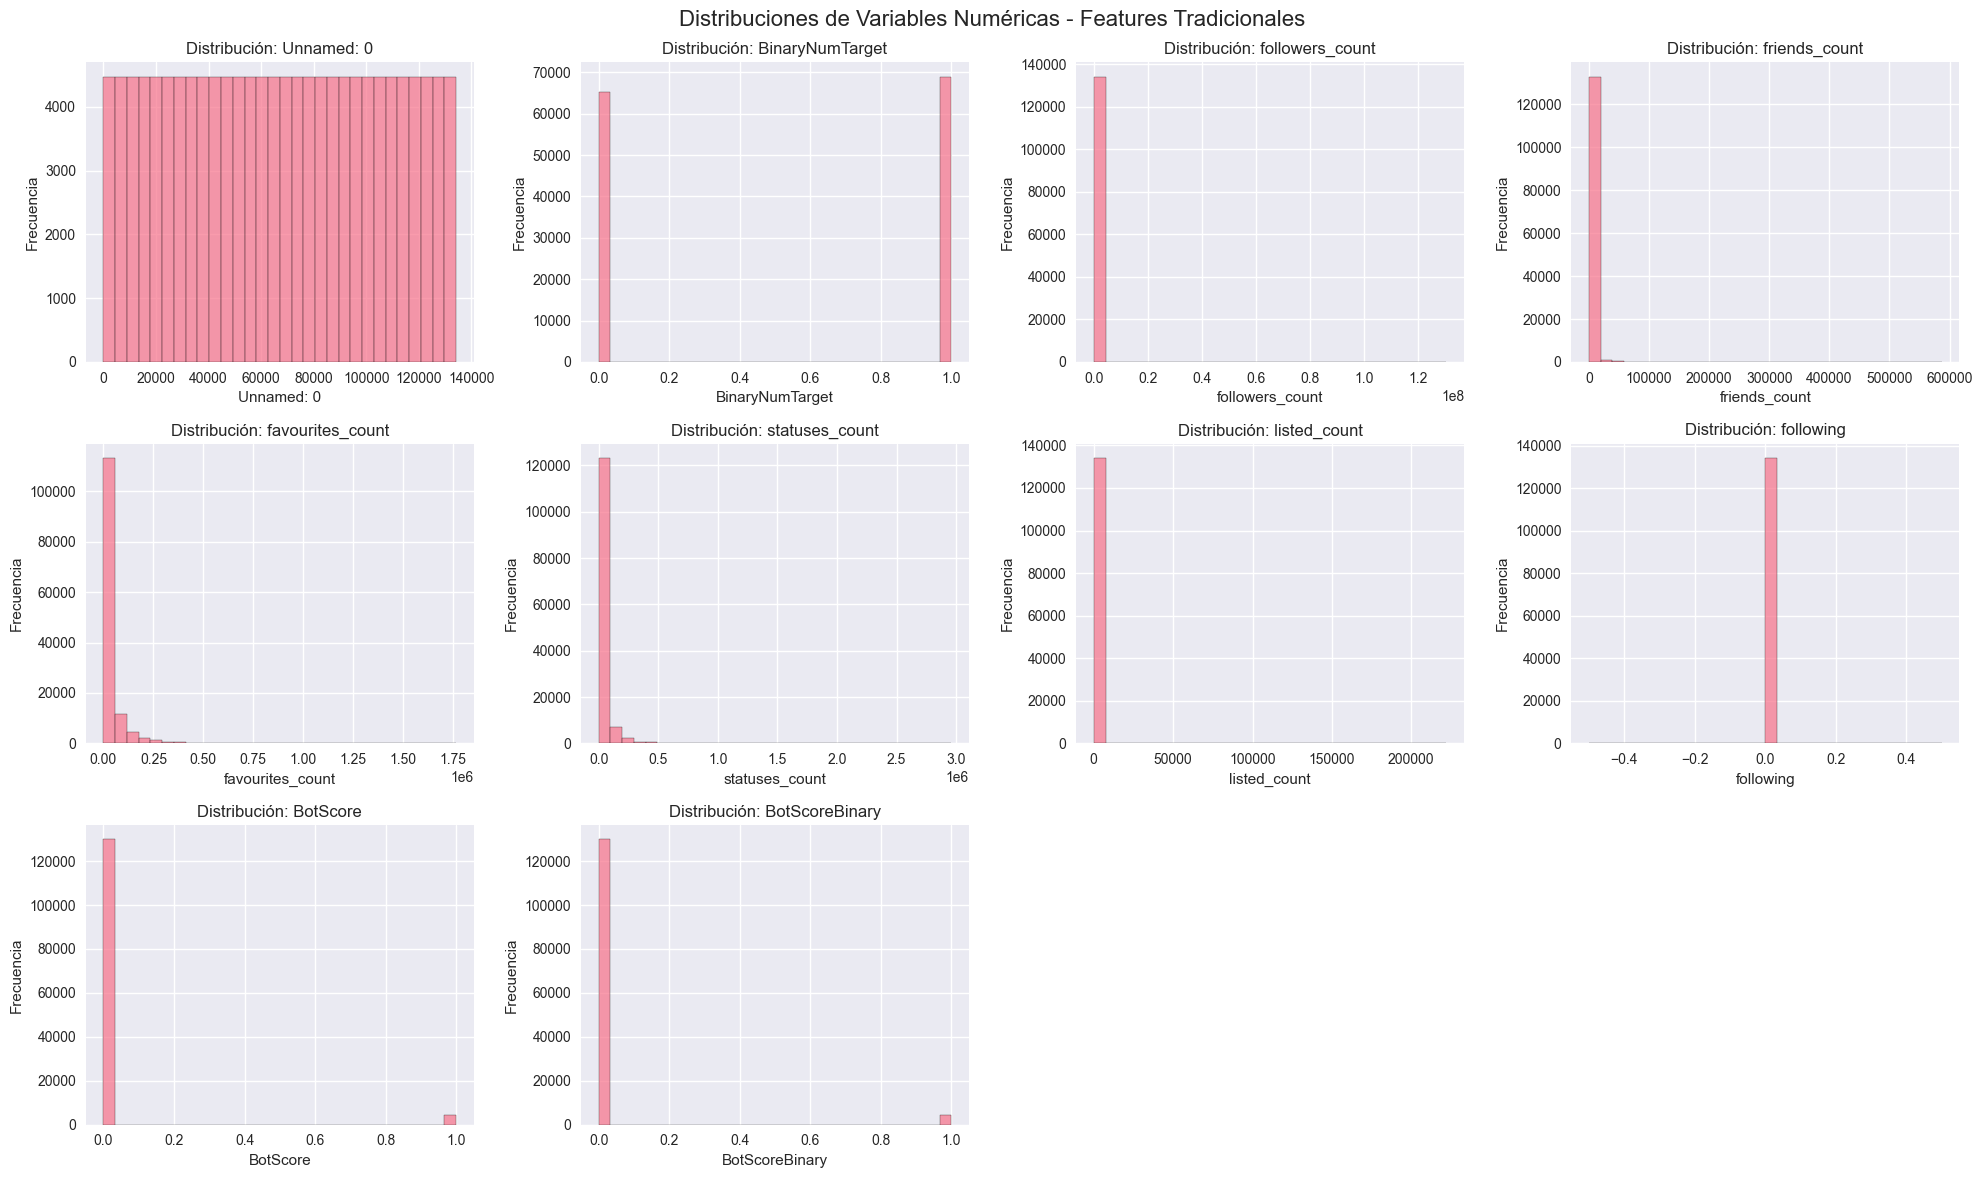


ANÁLISIS DE DISTRIBUCIONES NUMÉRICAS: Social Media
------------------------------------------------------------
- Variables numéricas encontradas: 1

- Estadísticas descriptivas:


,Followers
count,462.000
mean,7512.536
std,52003.510
min,0.000
25%,50.000
50%,200.000
75%,781.250
max,627829.000


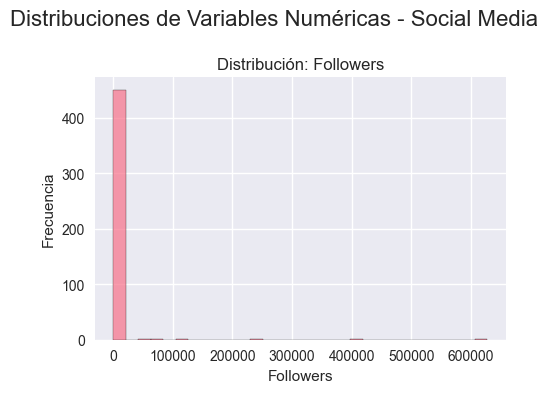

In [14]:
def analizar_distribuciones_numericas(df, nombre, max_cols=10):
    """Análisis de distribuciones de variables numéricas"""
    print(f"\nANÁLISIS DE DISTRIBUCIONES NUMÉRICAS: {nombre}")
    print("-" * 60)
    
    # Seleccionar columnas numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_cols) == 0:
        print("* No hay columnas numéricas en este dataset")
        return
    
    print(f"- Variables numéricas encontradas: {len(numeric_cols)}")
    
    # Estadísticas descriptivas
    print("\n- Estadísticas descriptivas:")
    display(df[numeric_cols].describe().round(3))
    
    # Visualización de distribuciones (primeras max_cols columnas)
    cols_to_plot = numeric_cols[:max_cols]
    n_cols = min(4, len(cols_to_plot))
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    if len(cols_to_plot) > 0:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
        
        for i, col in enumerate(cols_to_plot):
            if i < len(axes):
                df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
                axes[i].set_title(f'Distribución: {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frecuencia')
        
        # Ocultar ejes vacíos
        for i in range(len(cols_to_plot), len(axes)):
            axes[i].set_visible(False)
        
        plt.suptitle(f'Distribuciones de Variables Numéricas - {nombre}', fontsize=16)
        plt.tight_layout()
        plt.show()

# Análisis para cada dataset
analizar_distribuciones_numericas(df1_features, "Features Tradicionales")
analizar_distribuciones_numericas(df2_social, "Social Media")

## 6. Análisis de Correlaciones


ANÁLISIS DE CORRELACIONES: Features Tradicionales
------------------------------------------------------------

- Top 10 correlaciones con 'BinaryNumTarget':


,Correlación
Unnamed: 0,-0.748036
URLs,-0.136375
normalize_influence,0.131866
pronouns,-0.114162
cred,0.111584
PERSON_percentage,-0.111567
hashtags,0.105710
past_verbs,-0.092284
present_verbs,-0.092082
short_word_freq,-0.087121


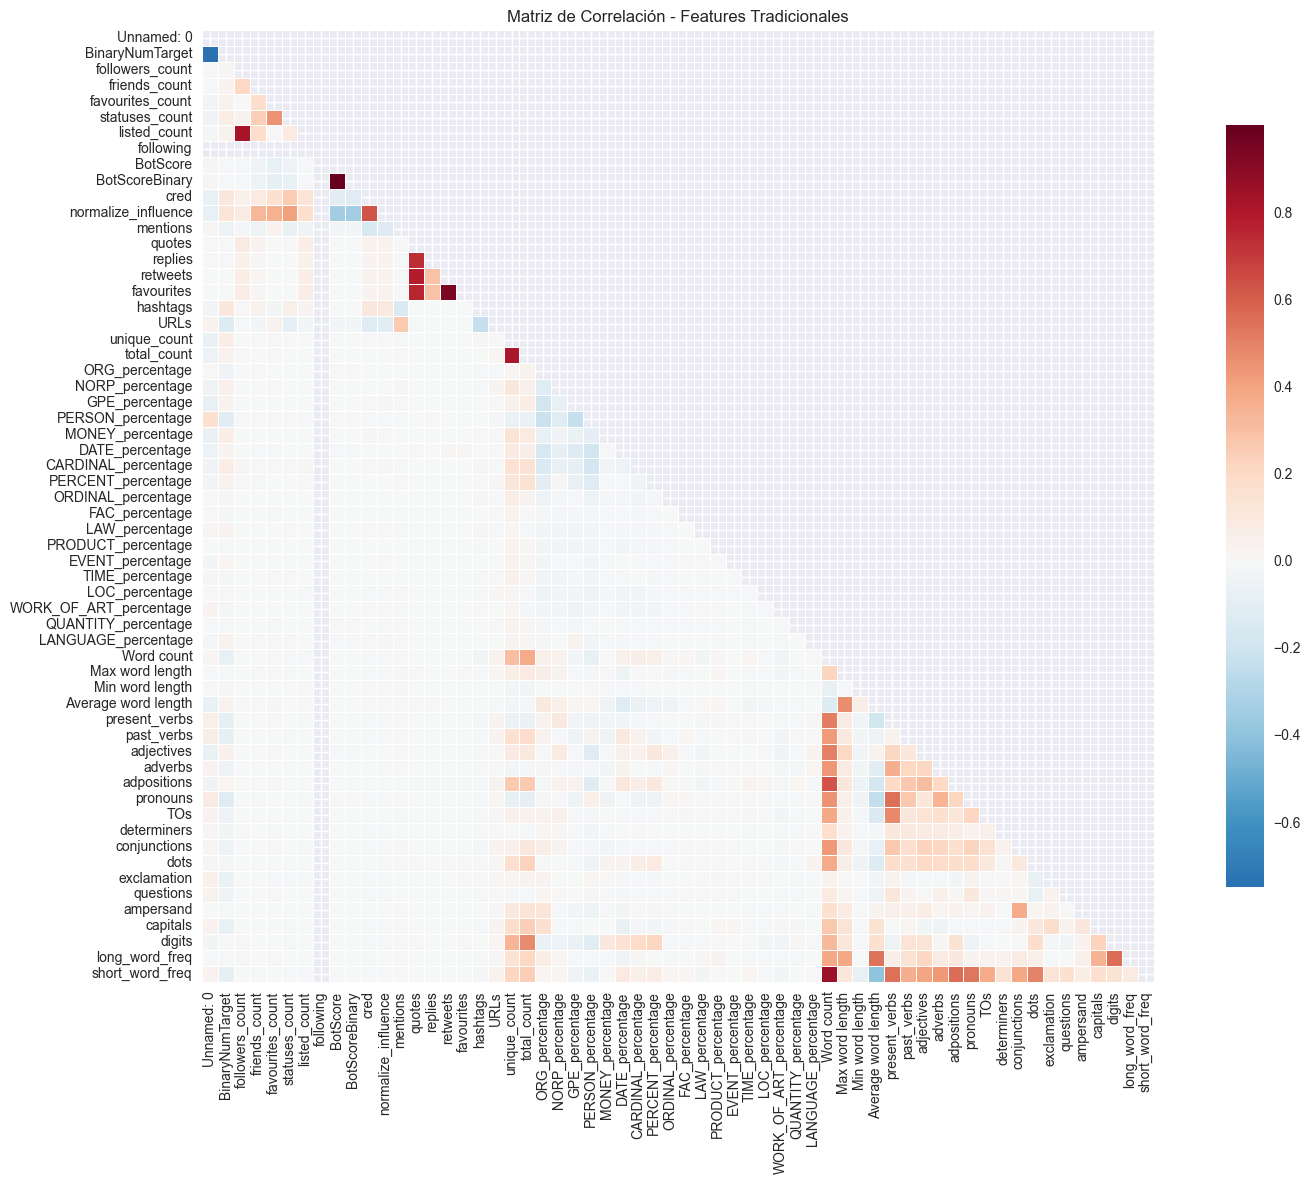


**  Correlaciones altas detectadas (|r| > 0.8):


,Variable_1,Variable_2,Correlacion
1,BotScore,BotScoreBinary,0.999169
2,retweets,favourites,0.947228
4,Word count,short_word_freq,0.853101
0,followers_count,listed_count,0.815270
3,unique_count,total_count,0.813542


/// Considerar eliminar variables redundantes para evitar multicolinealidad


In [15]:
def analizar_correlaciones(df, nombre, target_col=None):
    """Análisis de correlaciones entre variables numéricas"""
    print(f"\nANÁLISIS DE CORRELACIONES: {nombre}")
    print("-" * 60)
    
    # Seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number])
    
    if numeric_df.shape[1] < 2:
        print("* Insuficientes variables numéricas para análisis de correlación")
        return
    
    # Matriz de correlación
    corr_matrix = numeric_df.corr()
    
    # Correlaciones con variable objetivo si existe
    if target_col and target_col in corr_matrix.columns:
        target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
        print(f"\n- Top 10 correlaciones con '{target_col}':")
        display(target_corr.head(10).to_frame('Correlación'))
    
    # Mapa de calor de correlaciones
    plt.figure(figsize=(16, 12))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title(f'Matriz de Correlación - {nombre}')
    plt.tight_layout()
    plt.show()
    
    # Identificar correlaciones altas (excluyendo diagonal)
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_value = corr_matrix.iloc[i, j]
            if abs(corr_value) > 0.8:  # Umbral de correlación alta
                high_corr_pairs.append({
                    'Variable_1': corr_matrix.columns[i],
                    'Variable_2': corr_matrix.columns[j],
                    'Correlacion': corr_value
                })
    
    if high_corr_pairs:
        print(f"\n**  Correlaciones altas detectadas (|r| > 0.8):")
        high_corr_df = pd.DataFrame(high_corr_pairs)
        display(high_corr_df.sort_values('Correlacion', key=abs, ascending=False))
        print("/// Considerar eliminar variables redundantes para evitar multicolinealidad")
    else:
        print("\n¨¨ No se detectaron correlaciones extremadamente altas")

# Análisis de correlaciones
analizar_correlaciones(df1_features, "Features Tradicionales", "BinaryNumTarget")

## 7. Resumen de Hallazgos y Recomendaciones

In [16]:
print("\n" + "="*80)
print("RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO")
print("="*80)

print("\nHALLAZGOS PRINCIPALES:")
print("-" * 40)

# Resumen de dimensiones
print(f"- Dataset 1 (Features): {df1_features.shape[0]:,} filas x {df1_features.shape[1]} columnas")
print(f"- Dataset 1 (Truth Seeker): {df1_truth.shape[0]:,} filas x {df1_truth.shape[1]} columnas")
print(f"- Dataset 2 (Social Media): {df2_social.shape[0]:,} filas x {df2_social.shape[1]} columnas")

# Análisis de balance de clases
if 'BinaryNumTarget' in df1_features.columns:
    balance = df1_features['BinaryNumTarget'].value_counts(normalize=True)
    print(f"\nBALANCE DE CLASES (Dataset Features):")
    for clase, prop in balance.items():
        print(f"   * Clase {clase}: {prop:.2%}")


RESUMEN EJECUTIVO - ANÁLISIS EXPLORATORIO

HALLAZGOS PRINCIPALES:
----------------------------------------
- Dataset 1 (Features): 134,198 filas x 64 columnas
- Dataset 1 (Truth Seeker): 134,198 filas x 9 columnas
- Dataset 2 (Social Media): 462 filas x 17 columnas

BALANCE DE CLASES (Dataset Features):
   * Clase 1.0: 51.36%
   * Clase 0.0: 48.64%
